In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_excel(r"C:\Users\sinfo\Desktop\ehd.xlsx")

In [3]:
df.to_csv ("ethereum.csv", index = None,  header=True) 


In [4]:
df

,Date,Open,High,Low,Close,Volume
0,2016-03-10,11.20,11.85,11.07,11.75,4
1,2016-03-11,11.75,11.95,11.75,11.95,179
2,2016-03-12,11.95,13.45,11.95,12.92,833
3,2016-03-13,12.92,15.07,12.92,15.07,1295
4,2016-03-14,15.07,15.07,11.40,12.50,92183
...,...,...,...,...,...,...
2285,2022-06-12,1531.50,1542.01,1430.93,1435.46,1817579
2286,2022-06-13,1434.43,1454.07,1168.68,1206.67,4386650
2287,2022-06-14,1206.67,1261.39,1078.11,1210.84,3267119
2288,2022-06-15,1208.82,1244.80,1016.99,1237.92,3734568


In [5]:
df.shape

(2290, 6)

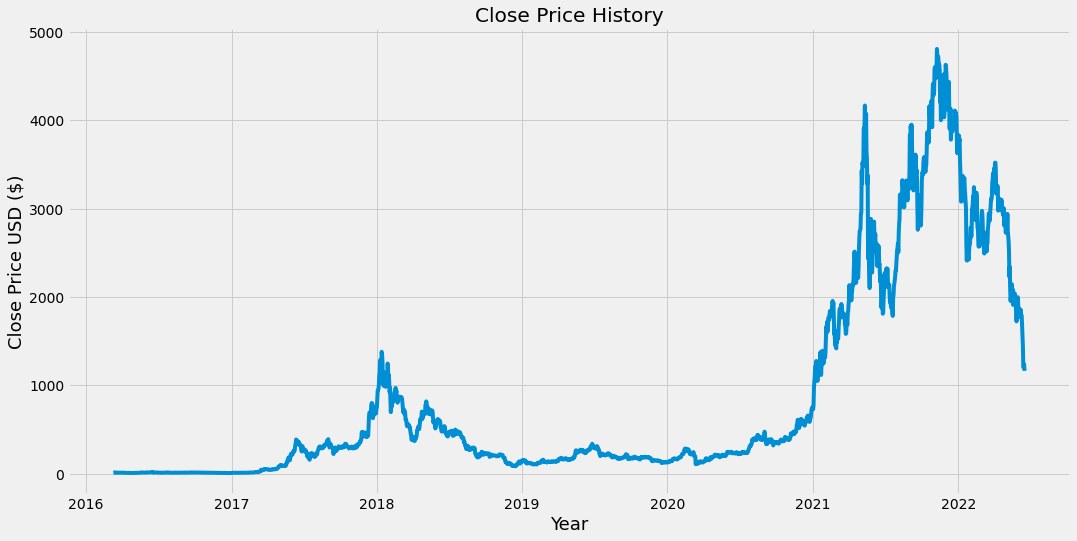

In [6]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot( df['Date'], df['Close'])
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.show()

In [7]:
# Create a new dataframe  with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe into a numpy array
dataset = data.values

# Get the number of rows to train the model on - 80%
training_data_len = math.ceil(len(dataset) * .8)

In [8]:
training_data_len

1832

In [9]:
# Scale the data - advantageous always

# Creating MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00105172],
       [0.00109337],
       [0.00129538],
       ...,
       [0.25077473],
       [0.25641442],
       [0.24105313]])

In [10]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00105172, 0.00109337, 0.00129538, 0.00174314, 0.00120791,
       0.00132454, 0.00128705, 0.00084137, 0.00084137, 0.00075182,
       0.00072475, 0.00109337, 0.00097258, 0.00119333, 0.00093717,
       0.00082679, 0.00089552, 0.00077056, 0.00102464, 0.00106005,
       0.00107254, 0.00098091, 0.00102464, 0.00102256, 0.00105172,
       0.00092676, 0.00077056, 0.00084554, 0.00071225, 0.00062686,
       0.00051024, 0.00042902, 0.00041236, 0.00017286, 0.00028948,
       0.00036654, 0.00033738, 0.0003832 , 0.0005748 , 0.00047275,
       0.0004186 , 0.00039778, 0.00029365, 0.00026449, 0.00036654,
       0.00029156, 0.00017494, 0.00016661, 0.00022909, 0.0001312 ,
       0.00017077, 0.00045193, 0.00042693, 0.00068726, 0.00054981,
       0.0005748 , 0.00064352, 0.00055189, 0.00055189, 0.00058313])]
[0.0005456423585078554]

[array([0.00105172, 0.00109337, 0.00129538, 0.00174314, 0.00120791,
       0.00132454, 0.00128705, 0.00084137, 0.00084137, 0.00075182,
       0.00072475, 0.00109337, 0.

In [11]:
# Convert the x_train and y_train to numpy arrays, so that we can use them to train the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
# Reshape the data, because the LSTM network expects the input to be 3D, in the form of samples, in the form of timesteps, 
# number of features. Thus, now since x_train dataset is 2D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1772, 60, 1)

In [13]:
# Build the LSTM model
model = Sequential()
# Adding a layer - LSTM layer with 50 neurons to our model. Return sequences is true since we'll use another LSTM layer
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
# Adding a second LSTM layer
model.add(LSTM(50, return_sequences=False))
# Adding other layers to our model architecture
model.add(Dense(25))
model.add(Dense(1))

In [14]:
# Compile the model
# An optimizer is used to improve upon the loss function. 
# Loss function is used to measure how well the model did on training.
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Train the Model
# epochs is the number of iterations when the entire dataset is passed forward and backward through a neural network
model.fit(x_train, y_train, batch_size=1, epochs=1)

1772/1772 [==============================] - 57s 29ms/step - loss: 4.6400e-04


In [16]:
# Create the testing data set
# Create a new array containing scaled values from index 1772 to 2290
test_data = scaled_data[training_data_len - 60: , :]

# Create the test datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [17]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [18]:
# Reshape the data
# 1 represents the number of features
x_test = np.reshape(x_test , (x_test.shape[0], x_test.shape[1], 1))

In [19]:
# Get the models predicted price values
predictions = model.predict(x_test)
# Unscaling the values. Getting predicitions to hold the values in y_test
predictions = scaler.inverse_transform(predictions)

15/15 [==============================] - 2s 29ms/step


In [20]:
# Evaluating the model
# Get the root mean squared error (RMSE) - lower values indicate better fit
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

125.90998117238675

C:\Users\sinfo\AppData\Local\Temp/ipykernel_44096/1089326374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


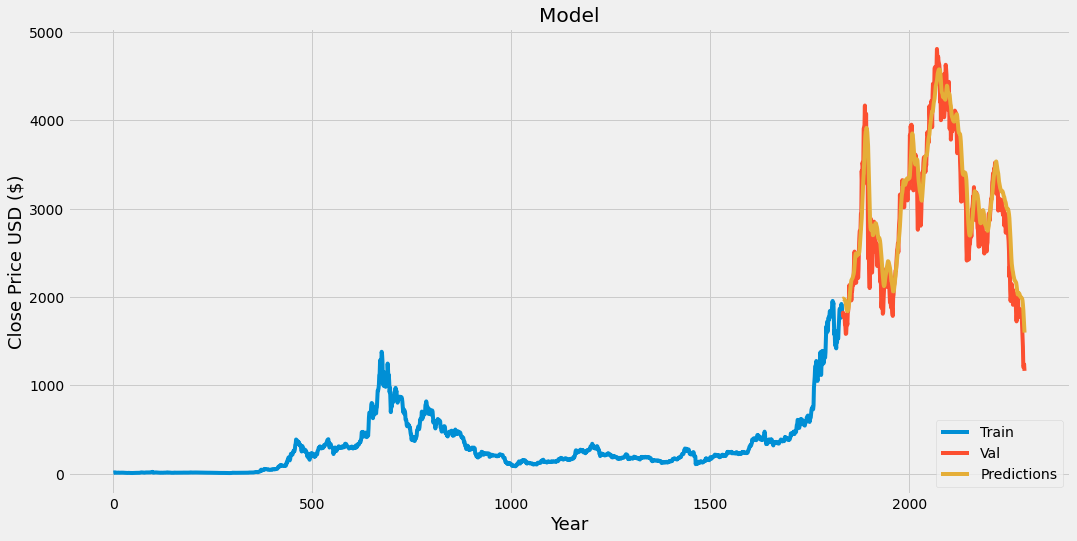

In [21]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
# Show the valid and predicted prices
valid

,Close,Predictions
1832,1804.85,1978.824585
1833,1823.35,1980.911377
1834,1776.08,1982.497803
1835,1809.64,1977.707764
1836,1804.60,1974.896973
...,...,...
2285,1435.46,1915.799316
2286,1206.67,1855.955933
2287,1210.84,1766.881836
2288,1237.92,1675.456543


In [ ]:
df_q = pd.read_excel(r"C:\Users\sinfo\Desktop\ehd.xlsx")